# Draft analysis 

---

Group name: Lena Breitberg, Ji Huixiao, Paraskevas Papadopoulos

---


## Introduction

*This section includes an introduction to the project motivation, data, and research question. Include a data dictionary* 

## Setup

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns  

import altair as alt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Data

## Import data

In [2]:
# import data
ROOT = "https://raw.githubusercontent.com/hdm-statistik-lpj/project/main/data/external/"
DATA = "immobilienNuernberg.csv"
df = pd.read_csv(ROOT + DATA)

### Data structure

In [94]:
# show the first rows
pd.set_option('display.max_columns', None)
df.head()

,General.EstateTypeKey,General.ReferenceNumber,General.DistributionTypeKey,General.ConstructionYear,General.LivingSpace,Tealium.object_locationid,Tealium.object_address_is_visible,Tealium.object_zip,Tealium.object_currency,Tealium.object_features,Tealium.object_objektart_sub,Tealium.expose_type,Tealium.broker_guid,Tealium.object_count_photos,LocalRatings.scores.local_amenities,LocalRatings.scores.mobility,MetaBadges,Price.AdditionalInformation.Commission.CommissionType,EstateAddress.City,EstateAddress.ZipCode,EstateAddress.Street,Offerer.addressGuid,Offerer.globalUserId,Offerer.contactData.companyName,Project.Address.PostCode,Project.Address.Street,Project.Address.HouseNumber,Latitude,Longitude,Stadtteil,Stadt,PRICE,ROOMS,PRICE_COMMONCHARGE,EnergyType,Class,Value,CATEGORY,FLOOR,USAGE,SUITABILITY,CONDITION,HOUSECONDITION,PARKINGSLOT,ENERGY,BUILDINGTYPE,HEATING,ELEVATOR,EQUIPMENTS
0,WOHNUNG,001/G1/E114,ZUM_KAUF,2023.0,247.07,493480,True,90482,EUR,"['Neubau', 'WANNE', 'gaestewc', 'Bad/WC getren...",wohnung,project,4821481,15.0,7.7,9.5,"[{'label': 'Provisionsfrei', 'highlight': True}]",COMMISSION_FREE,Nürnberg,90482,Ostendstraße 120,69C9B07CBE7147ED868C55D3368C8261,4821481,Instone Real Estate Development GmbH Niederlas...,90482.0,Ostendstraße,115,49.45760,11.13188,Mögeldorf,Nürnberg,2539000.0,7.0,NaN,NaN,NaN,NaN,NaN,11. Geschoss,NaN,NaN,Erstbezug,Neubau,Tiefgarage,NaN,NaN,Fußbodenheizung,Personenaufzug,NaN
1,WOHNUNG,NaN,ZUM_KAUF,1900.0,69.00,493430,False,90461,EUR,"['Dach ausgebaut', 'WANNE', 'gaestewc', 'Bad/W...",MAISONETTE,standard,2704438,23.0,6.5,9.7,[],COMMISSION_REQUIRED,Nürnberg,90461,NaN,96453B9B5899480AB506126D5E0E9140,2704438,Immobilien Büro Franken24 UG (haftungsbeschränkt),NaN,NaN,NaN,49.42749,11.07581,Gibitzenhof,Nürnberg,225000.0,2.0,280.0,NaN,NaN,NaN,Maisonette,4. Geschoss (Dachgeschoss),vermietet,WG-geeignet,renoviert / saniert,NaN,NaN,Gas,NaN,Etagenheizung,NaN,NaN
2,WOHNUNG,NaN,ZUM_KAUF,1972.0,69.46,493465,False,90473,EUR,"['WANNE', 'GEPFLEGT', 'FERN', 'LAMINAT', 'FLIE...",wohnung,standard,7111707,1.0,5.7,7.8,[],COMMISSION_DEFAULT,Nürnberg,90473,NaN,9C587ED116BD427E9DD13790553F0A5F,7111707,W &a; F Liegenschaften GmbH,NaN,NaN,NaN,49.40815,11.13376,Langwasser,Nürnberg,195000.0,3.0,283.0,NaN,NaN,NaN,NaN,8. Geschoss,vermietet,NaN,gepflegt,NaN,Tiefgarage,Fernwärme,NaN,NaN,NaN,NaN
3,WOHNUNG,X4_301,ZUM_KAUF,2023.0,82.81,493524,True,90429,EUR,"['Neubau', 'DUSCHE', 'Personenaufzug', 'ERSTBE...",wohnung,project,53124,6.0,8.2,9.6,"[{'label': 'Provisionsfrei', 'highlight': True}]",COMMISSION_FREE,Nürnberg,90429,Maximilianstraße 56,F2237DED191344059DB32E4F5C9709F0,53124,EcoLoft Gruppe AG,90429.0,Maximilianstraße,56,49.46008,11.04266,Seeleinsbühl,Nürnberg,483623.0,3.0,NaN,UNDEFINED,DE_ENV2014_CLASS_A_PLUS,24.5,NaN,3. Geschoss,NaN,NaN,Erstbezug,Neubau,NaN,Blockheizkraftwerk,KfW 55,Fußbodenheizung,Personenaufzug,NaN
4,WOHNUNG,X4_204,ZUM_KAUF,2023.0,75.52,493524,True,90429,EUR,"['Neubau', 'DUSCHE', 'Personenaufzug', 'Erdges...",wohnung,project,53124,6.0,8.2,9.6,"[{'label': 'Provisionsfrei', 'highlight': True}]",COMMISSION_FREE,Nürnberg,90429,Maximilianstraße 56,F2237DED191344059DB32E4F5C9709F0,53124,EcoLoft Gruppe AG,90429.0,Maximilianstraße,56,49.46008,11.04266,Seeleinsbühl,Nürnberg,433956.0,3.0,NaN,UNDEFINED,DE_ENV2014_CLASS_A_PLUS,24.5,NaN,2. Geschoss (Erdgeschoss),NaN,NaN,Erstbezug,Neubau,NaN,Blockheizkraftwerk,KfW 55,Fußbodenheizung,Personenaufzug,NaN


In [95]:
# data overview (with meta data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 49 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   General.EstateTypeKey                                  961 non-null    object 
 1   General.ReferenceNumber                                832 non-null    object 
 2   General.DistributionTypeKey                            961 non-null    object 
 3   General.ConstructionYear                               961 non-null    float64
 4   General.LivingSpace                                    961 non-null    float64
 5   Tealium.object_locationid                              961 non-null    int64  
 6   Tealium.object_address_is_visible                      961 non-null    bool   
 7   Tealium.object_zip                                     961 non-null    int64  
 8   Tealium.object_currency                           

In [96]:
# show all variables in the data set
df.columns

Index(['General.EstateTypeKey', 'General.ReferenceNumber',
       'General.DistributionTypeKey', 'General.ConstructionYear',
       'General.LivingSpace', 'Tealium.object_locationid',
       'Tealium.object_address_is_visible', 'Tealium.object_zip',
       'Tealium.object_currency', 'Tealium.object_features',
       'Tealium.object_objektart_sub', 'Tealium.expose_type',
       'Tealium.broker_guid', 'Tealium.object_count_photos',
       'LocalRatings.scores.local_amenities', 'LocalRatings.scores.mobility',
       'MetaBadges', 'Price.AdditionalInformation.Commission.CommissionType',
       'EstateAddress.City', 'EstateAddress.ZipCode', 'EstateAddress.Street',
       'Offerer.addressGuid', 'Offerer.globalUserId',
       'Offerer.contactData.companyName', 'Project.Address.PostCode',
       'Project.Address.Street', 'Project.Address.HouseNumber', 'Latitude',
       'Longitude', 'Stadtteil', 'Stadt', 'PRICE', 'ROOMS',
       'PRICE_COMMONCHARGE', 'EnergyType', 'Class', 'Value', 'CATEGORY',

### Data corrections

#### Spaltenumbenennung der in der Analyse verwendeten Variablen

In [3]:
df.rename(columns={
    # Allgemeine Immobilieninformationen
    'General.EstateTypeKey': 'estateTypeKey',            # Immobilientyp (Wohungen)
    'General.ReferenceNumber': 'referenceNumber',        # Referenznummer für Duplikatsuche
    'General.DistributionTypeKey': 'distributionTypeKey', # Neubau- oder Bestandswohnung 
    'General.ConstructionYear': 'constructionYear',      # Baujahr der Immobilie
    'General.LivingSpace': 'livingSpace',                # Wohnfläche in Quadratmetern

    # Tealium Objektinformationen
    'Tealium.object_features': 'objectFeatures',         # Weitere Merkmale der Immobilie
    'Tealium.broker_guid': 'brokerGuid',                 # Makler-ID
    'Tealium.object_count_photos': 'photosCount',        # Anzahl der Fotos (Marketing)

    # Bewertungen vor Ort
    'LocalRatings.scores.local_amenities': 'localAmenitiesScore', # Bewertung der lokalen Annehmlichkeiten
    'LocalRatings.scores.mobility': 'localMobilityScore',         # Bewertung der Mobilität und Verkehrsanbindung

    # Metainformationen
    'MetaBadges': 'metaBadges', # # Metabadge-Informationen, wie "Zwangsversteigerung"

    # Preis- und Provisionsinformationen
    'PRICE': 'price', # Preis der Wohnung

    # Informationen über den Anbieter
    'Tealium.broker_guid': 'brokerGuid', # Makler-Anbieter-ID

    # Standortinformationen
    'Latitude': 'latitudeDistrict',  # Breitengrad des Stadtteils
    'Longitude': 'longitudeDistrict',  # Längengrad des Stadtteils
    'Stadtteil': 'district',  # Stadtteil
    'Stadt': 'town',  # Überprüfung, ob alle Wohnungen in Nürnberg sind

    # Energieinformationen
    'EnergyType': 'energyType',
    'Class': 'energyClass',        # Zur Schätzung von energyType bei fehlenden Werten
    'Value': 'energyConsumption',  # Zur Schätzung von energyType bei fehlenden Werten

    # Informationen zu den Zimmern
    'ROOMS': 'rooms',  # Anzahl der Zimmer

    # Weitere Einzelheiten zur Immobilie
    'FLOOR': 'floor',          # Etage
    'PARKINGSLOT': 'parkingSlot', # Parkplatz verfügbar
    'ENERGY': 'energy',        # Hauptenergieträger
    'ELEVATOR': 'elevator',    # Aufzug vorhanden

}, inplace=True)

#### Duplikate

Wir suchen nach Duplikaten in den Referenznummern (referenceNumber) innerhalb desselben Maklers (Gruppierungsvariable: brokerGuid), da Duplikate nur innerhalb desselben Maklers auftreten können. 
Annahme: Eigentümer beauftragen nur einen Makler mit dem Verkauf, um mögliche höhere Maklerkosten zu vermeiden.

Zudem wird überprüft ob der Datensatz identische Datensätze enthält.

Variablen, die für diese Prüfungen verwendet wurden, werden im Anschluss aus dem DataFrame entfernt, wenn diese voraussichtlich keine weiteren Mehrwert bitten.

In [4]:
duplicateCount = df.groupby(['brokerGuid', 'referenceNumber']).size().reset_index(name='Duplicate Count').sort_values(by='Duplicate Count', ascending=False)
#print(duplicateCount)
if duplicateCount['Duplicate Count'].eq(1).all():
    print("Keine Duplikate innerhalb desselben Maklers gefunden")

# Überprüfung auf identische Zeilen
identicalRows = df[df.duplicated()]
if identicalRows.empty:
    print("Keine identischen Zeilen gefunden")

Keine Duplikate innerhalb desselben Maklers gefunden
Keine identischen Zeilen gefunden


In [5]:
df.drop(columns=['referenceNumber', 'brokerGuid'], inplace=True)

#### Immobiliendaten aus "Tealium.object_features" extrahieren und Erstellung von Dummy-Variablen

In [6]:
import re
from collections import Counter

# Funktion um Wörter direkt aus einem String zu extrahieren
def extractWords(s):
    # Wörter auf Bais folgender Zeichenfolgen extrahieren
    return re.findall(r'\b\w+\b', s)

# Erstellung eines flachen Liste mit den extrahierten Wörter
directExtractedWords = df['objectFeatures'].apply(extractWords)
allWords = [word for sublist in directExtractedWords for word in sublist]

# Häufigkeit jedes Wortes
wordCounts = Counter(allWords)

# Konvertierung in einem Dataframe
words_df = pd.DataFrame(wordCounts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
words_df

,Word,Frequency
8,Kelleranteil,721
35,Balkon,476
9,Personenaufzug,464
24,GAS,441
1,WANNE,433
...,...,...
115,Sonnenschutz,2
112,SEE,1
114,WACHDIENST,1
116,KFW70,1


In [7]:
import ast  # zum Auswerten von Zeichenketten als Listen

# Funktion zum Analysieren der Zeichenketten
def parseFeatures(feature_str):
    try:
        features = ast.literal_eval(feature_str)
        if isinstance(features, list):
            return features
        else:
            return []
    except:
        return []

# Anwenden auf die Spalte 'objectFeatures'
df['objectFeatures'] = df['objectFeatures'].apply(parseFeatures)

# Erstellen von Dummy-Variablen
commonFeatures = ['Kamin','kamin', 'Personenaufzug', 'Tiefgarage', 'Stellplatz', 'Garage', 'Parkhaus', 'Carport', 'Sauna', 'Swimmingpool', 'KÜCHE', 'Küche', 'Einbauküche', 'Balkon', 'Terrasse', 'Garten', 'Loggia', 'Kelleranteil', 'abstellraum', 'gaestewc', 'WC', 'rollstuhlgerecht', 'BETREUTES_WOHNEN']  # Example features, need to be adjusted based on actual data

for feature in commonFeatures:
    df[feature] = df['objectFeatures'].apply(lambda x: 1 if feature in x else 0)

# Löschen der Spalte 'objectFeatures'
df.drop('objectFeatures', axis=1, inplace=True)

# Anzeigen
df.head()

,estateTypeKey,distributionTypeKey,constructionYear,livingSpace,Tealium.object_locationid,Tealium.object_address_is_visible,Tealium.object_zip,Tealium.object_currency,Tealium.object_objektart_sub,Tealium.expose_type,...,Balkon,Terrasse,Garten,Loggia,Kelleranteil,abstellraum,gaestewc,WC,rollstuhlgerecht,BETREUTES_WOHNEN
0,WOHNUNG,ZUM_KAUF,2023.0,247.07,493480,True,90482,EUR,wohnung,project,...,0,1,0,1,1,1,1,0,0,0
1,WOHNUNG,ZUM_KAUF,1900.0,69.00,493430,False,90461,EUR,MAISONETTE,standard,...,0,0,0,0,1,0,1,0,0,0
2,WOHNUNG,ZUM_KAUF,1972.0,69.46,493465,False,90473,EUR,wohnung,standard,...,1,0,0,0,0,1,0,0,0,0
3,WOHNUNG,ZUM_KAUF,2023.0,82.81,493524,True,90429,EUR,wohnung,project,...,1,0,0,0,0,1,0,0,0,0
4,WOHNUNG,ZUM_KAUF,2023.0,75.52,493524,True,90429,EUR,wohnung,project,...,1,0,0,0,0,1,0,0,0,0


#### Einhaltung der ursprünglichen Suchkriterien

Für die fortlaufende Analyse sind wir an folgenden Kriterien interessiert:

- Nur Wohnungen werden berücksichtigt; andere Arten von Immobilien werden aus der Analyse ausgeschlossen.
- Wohnungen, die zwangsversteigert werden, werden nicht einbezogen, da ihre Verkaufspreise nicht marktnah sind.
- Es werden ausschließlich Wohnungen betrachtet, die zum Verkauf stehen.
- Beschränkung auf Wohnungen in der Stadt Nürnberg.

Immobilien, die diese Kriterien nicht erfüllen, werden aus dem Datensatz entfernt. Variablen, die für diese Prüfungen verwendet wurden, werden im Anschluss aus dem DataFrame entfernt, wenn diese voraussichtlich keine weiteren Mehrwert bieten.

In [8]:
# Häufigkeit bestimmen
valueCountsList = [
    df['estateTypeKey'].value_counts().rename('estateTypeCount'),
    df['metaBadges'].value_counts().rename('metaBadgesCount'),
    df['distributionTypeKey'].value_counts().rename('distributionTypeKeyCount'),
    df['town'].value_counts().rename('townCount')
]

# Übersicht
combinedCounts = pd.concat(valueCountsList, axis=1, keys=[s.name for s in valueCountsList])

print(combinedCounts)

                                                    estateTypeCount  \
WOHNUNG                                                       959.0   
HAUS                                                            2.0   
[]                                                              NaN   
[{'label': 'Provisionsfrei', 'highlight': True}]                NaN   
[{'label': 'Privater Anbieter', 'highlight': Tr...              NaN   
[{'label': 'Zwangsversteigerung', 'highlight': ...              NaN   
ZUM_KAUF                                                        NaN   
Nürnberg                                                        NaN   

                                                    metaBadgesCount  \
WOHNUNG                                                         NaN   
HAUS                                                            NaN   
[]                                                            667.0   
[{'label': 'Provisionsfrei', 'highlight': True}]              253.0   
[{'la

In [9]:
# Löschen der Zeilen mit "estateTypeKey" "HAUS"
df.drop(df[df['estateTypeKey'].str.contains('HAUS')].index, inplace=True)
# Löschen Variablen
df = df.drop(columns=['estateTypeKey'])

In [10]:
# Löschen der Zeilen mit Label "Zwangsversteigerung" in der Spalte metaBadges
df = df[~df['metaBadges'].astype(str).str.contains("'label': 'Zwangsversteigerung'")]
# Löschen Variablen
df.drop(columns=['metaBadges'], inplace=True)

In [11]:
# Löschen Variablen
df.drop(columns=['distributionTypeKey', 'town'], inplace=True)

#### Umgang mit fehlenden Werten

Fehlende Werte in photosCount werden mit Null ersetzt. Annahme: Bilder für diese Immobilie wurden nicht veröffentlicht.

In [12]:
df['photosCount'].fillna(0, inplace=True)

Fehlende Werte in localAmenitiesScore und localMobilityScore wurden durch den Durchschnittswert der jeweiligen Gruppe, basierend auf Längen- und Breitengrad, ersetzt.

In [13]:
# Gruppierung nach Längen- und Breitengrad und Berechnung des Durchschnittswerts für jede Gruppe
groupedData = df.groupby(['latitudeDistrict', 'longitudeDistrict'])[['localAmenitiesScore', 'localMobilityScore']].transform(lambda x: x.fillna(x.mean()))
# Ersetze die fehlenden Werte im ursprünglichen DataFrame 'df' durch die berechneten Durchschnittswerte
df['localAmenitiesScore'] = groupedData['localAmenitiesScore']
df['localMobilityScore'] = groupedData['localMobilityScore']

In [14]:
# Ersetze fehlende Werte in 'parkingSlot' mit '0'
df['parkingSlot'].fillna('0', inplace=True)

# Erstellung einer Dummy-Variable für parkingSlots, Tiefgarage, Stellplatz, Garage, Parkhaus und Carport
parkingColumns = ['Tiefgarage', 'Stellplatz', 'Garage', 'Parkhaus', 'Carport', 'parkingSlot']

# Erstelle die 'parkingSlots'-Dummy-Variable durch Addition der Spalten
df['parkingSlots'] = df[parkingColumns].sum(axis=1)

# Begrenze die Werte in 'parkingSlots' auf 1, wenn sie größer als 1 sind
df['parkingSlots'] = df['parkingSlots'].apply(lambda x: min(x, 1))

df.drop(columns = parkingColumns, inplace=True)

C:\Users\papad\AppData\Local\Temp\ipykernel_464\163966575.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['parkingSlots'] = df[parkingColumns].sum(axis=1)


In [15]:
# Erstellung einer Dummy-Variable für gaestewc und WC
gaesteWCColumns = ['gaestewc', 'WC']

# Erstelle die 'gaesteWC'-Dummy-Variable durch Addition der Spalten
df['gaesteWC'] = df[gaesteWCColumns].sum(axis=1)

# Begrenze die Werte in 'gaesteWC' auf 1, wenn sie größer als 1 sind
df['gaesteWC'] = df['gaesteWC'].apply(lambda x: min(x, 1))

df.drop(columns = gaesteWCColumns, inplace=True)

In [16]:
# Erstellung einer Dummy-Variable für Balkon, Terrasse, Garten und Loggia
privateOutdoorSpaceColumns = ['Balkon', 'Terrasse', 'Garten', 'Loggia',]

# Erstelle die 'privateOutdoorSpace'-Dummy-Variable durch Addition der Spalten
df['privateOutdoorSpace'] = df[privateOutdoorSpaceColumns].sum(axis=1)

# Begrenze die Werte in 'privateOutdoorSpace' auf 1, wenn sie größer als 1 sind
df['privateOutdoorSpace'] = df['privateOutdoorSpace'].apply(lambda x: min(x, 1))

df.drop(columns = privateOutdoorSpaceColumns, inplace=True)

In [17]:
# Erstellung einer Dummy-Variable für KÜCHE und Küche
kitchenColumns = ['KÜCHE', 'Küche']

# Erstelle die 'privateOutdoorSpace'-Dummy-Variable durch Addition der Spalten
df['kitchen'] = df[kitchenColumns].sum(axis=1)

# Begrenze die Werte in 'privateOutdoorSpace' auf 1, wenn sie größer als 1 sind
df['kitchen'] = df['kitchen'].apply(lambda x: min(x, 1))

df.drop(columns = kitchenColumns, inplace=True)

In [18]:
# Häufigkeit elevator
df['elevator'].value_counts()

Personenaufzug                  460
Personenaufzug, Lastenaufzug      4
Name: elevator, dtype: int64

In [19]:
# Ersetze fehlende Werte in 'elevator' mit '0'
df['elevator'].fillna('0', inplace=True)

# Umwandlung elevator zu Dummy-Variable
df['elevators'] = df['elevator'].str.contains('Personenaufzug').astype(int)

# Erstellung einer Dummy-Variable für elevator und Personenaufzug
elevatorColumns = ['elevators', 'Personenaufzug']

# Erstelle die 'elevators'-Dummy-Variable durch Addition der Spalten
df['elevator'] = df[elevatorColumns].sum(axis=1)

# Begrenze die Werte in 'elevator' auf 1, wenn sie größer als 1 sind
df['elevator'] = df['elevator'].apply(lambda x: min(x, 1))

df.drop(columns = elevatorColumns, inplace=True)

In [20]:
# Erstellung einer Dummy-Variable für Kamin und kamin
chimneyColumns = ['Kamin', 'kamin']

# Erstelle die 'chimney'-Dummy-Variable durch Addition der Spalten
df['chimney'] = df[chimneyColumns].sum(axis=1)

# Begrenze die Werte in 'chimney' auf 1, wenn sie größer als 1 sind
df['chimney'] = df['chimney'].apply(lambda x: min(x, 1))

df.drop(columns = chimneyColumns, inplace=True)

In [21]:
# Zählen aller Werte in der Spalte 'floor'
floorValueCounts = df['floor'].value_counts()

floorValueCounts

1. Geschoss                      183
Erdgeschoss                      162
2. Geschoss                      134
3. Geschoss                      107
4. Geschoss                       74
5. Geschoss                       28
3. Geschoss (Dachgeschoss)        19
Dachgeschoss                      15
6. Geschoss                       12
2. Geschoss (Dachgeschoss)        10
5. Geschoss (Dachgeschoss)        10
4. Geschoss (Dachgeschoss)         8
1. Geschoss (Erdgeschoss)          7
7. Geschoss                        5
13. Geschoss                       4
9. Geschoss                        3
8. Geschoss                        3
15. Geschoss                       3
14. Geschoss                       2
2. Geschoss (Erdgeschoss)          2
12. Geschoss                       2
1. Untergeschoss (Souterrain)      2
19. Geschoss                       1
6. Geschoss (Dachgeschoss)         1
2. Untergeschoss                   1
11. Geschoss                       1
1. Geschoss (Dachgeschoss)         1
9

In [22]:
# Kategorisierung der 'floor'-Variable

# Markierung fehlender Werte
df['floor'] = df['floor'].fillna('NaN')

# Kategorie 1: Erdgeschoss und Untergeschosse
df['floor'] = df['floor'].apply(lambda x: 'Erdgeschoss/Untergeschoss' if any(sub in x for sub in ['Erdgeschoss', 'Untergeschoss', 'Souterrain']) else x)

# Erstellung einer Dummy-Variable für Dachgeschosse
df['Dachgeschoss'] = df['floor'].apply(lambda x: 1 if 'Dachgeschoss' in x else 0)

# Kategorie 3: Nummer des Geschosses (wenn nicht Erdgeschoss/Untergeschoss und nicht Dachgeschoss)
df['floor'] = df['floor'].apply(lambda x: x.split('.')[0] if x != 'Erdgeschoss/Untergeschoss' and 'Dachgeschoss' not in x else x)

# Entfernen von Punkten am Ende der Geschossnummern
df['floor'] = df['floor'].str.replace(r'\.$', '')

# Erstellung einer Dummy-Variable für "Dachgeschoss" in der 'floor'-Spalte
df['attic'] = df['floor'].apply(lambda x: 1 if 'Dachgeschoss' in x else 0)

# Entfernen von ". Geschoss (Dachgeschoss)" aus der 'floor'-Spalte
df['floor'] = df['floor'].str.replace(r'\. Geschoss \(Dachgeschoss\)', '', regex=True)

# Ersetze "Dachgeschoss" durch "Missing" in der 'floor'-Spalte
df['floor'] = df['floor'].replace('Dachgeschoss', 'NaN')

# Erstellung einer Dummy-Variable für attic und Dachgeschoss
atticColumns = ['attic', 'Dachgeschoss']

# Erstelle die 'attics'-Dummy-Variable durch Addition der Spalten
df['attics'] = df[atticColumns].sum(axis=1)

# Begrenze die Werte in 'attics' auf 1, wenn sie größer als 1 sind
df['attics'] = df['attics'].apply(lambda x: min(x, 1))

df.drop(columns = atticColumns, inplace=True)

C:\Users\papad\AppData\Local\Temp\ipykernel_464\1422935585.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['floor'] = df['floor'].str.replace(r'\.$', '')


In [23]:
# Ableiten der Energieeffizienzklasse aus 'energyConsumption'

def deriveEnergyClass(energyConsumption):
    if pd.isna(energyConsumption):
        return 'NaN'
    elif energyConsumption < 30:
        return 'DE_ENV2014_CLASS_A_PLUS'
    elif energyConsumption < 50:
        return 'DE_ENV2014_CLASS_A'
    elif energyConsumption < 75:
        return 'DE_ENV2014_CLASS_B'
    elif energyConsumption < 100:
        return 'DE_ENV2014_CLASS_C'
    elif energyConsumption < 130:
        return 'DE_ENV2014_CLASS_D'
    elif energyConsumption < 160:
        return 'DE_ENV2014_CLASS_E'
    elif energyConsumption < 200:
        return 'DE_ENV2014_CLASS_F'
    elif energyConsumption < 250:
        return 'DE_ENV2014_CLASS_G'
    else:
        return 'DE_ENV2014_CLASS_H'

# Anwenden der Funktion auf die 'energyConsumption' Spalte
df['derivedEnergyClass'] = df['energyConsumption'].apply(deriveEnergyClass)

In [24]:
df[['energyClass', 'derivedEnergyClass']].head(100)

,energyClass,derivedEnergyClass
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,DE_ENV2014_CLASS_A_PLUS,DE_ENV2014_CLASS_A_PLUS
4,DE_ENV2014_CLASS_A_PLUS,DE_ENV2014_CLASS_A_PLUS
...,...,...
95,NaN,NaN
96,NaN,DE_ENV2014_CLASS_B
97,DE_ENV2014_CLASS_B,DE_ENV2014_CLASS_B
98,DE_ENV2014_CLASS_D,DE_ENV2014_CLASS_D


In [25]:
# Übernehmen den Wert aus 'derivedEnergyClass' in 'energyClass', wenn 'energyClass' NaN ist
df['energyClass'].fillna(df['derivedEnergyClass'], inplace=True)

In [26]:
# Löschen der Spalte 'derivedEnergyClass'
df.drop(columns=['derivedEnergyClass'], inplace=True)

In [27]:
# Zeige die Anzahl der fehlenden Werte für alle Variablen
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 0 to 960
Data columns (total 54 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   constructionYear                                       948 non-null    float64
 1   livingSpace                                            948 non-null    float64
 2   Tealium.object_locationid                              948 non-null    int64  
 3   Tealium.object_address_is_visible                      948 non-null    bool   
 4   Tealium.object_zip                                     948 non-null    int64  
 5   Tealium.object_currency                                948 non-null    object 
 6   Tealium.object_objektart_sub                           948 non-null    object 
 7   Tealium.expose_type                                    948 non-null    object 
 8   photosCount                                       

In [30]:
# Liste der ausgewählten Spalten für die weitere Analyse
selectedColumns = ['constructionYear', 'livingSpace','Tealium.expose_type', 'photosCount', 'localAmenitiesScore', 'localMobilityScore', 'latitudeDistrict', 'longitudeDistrict', 'district', 'price', 'rooms', 'energyClass', 'floor', 'energy', 'elevator', 'Sauna', 'Swimmingpool', 'Einbauküche', 'Kelleranteil', 'abstellraum', 'rollstuhlgerecht', 'BETREUTES_WOHNEN', 'parkingSlots', 'gaesteWC', 'privateOutdoorSpace', 'chimney', 'attics']

# DataFrame mit den ausgewählten Spalten für die weitere Analyse
new_df = df[selectedColumns]

# Spaltennamen ändern
new_df_names = {
    'Tealium.expose_type': 'exposeType',
    'Sauna': 'sauna',
    'Swimmingpool': 'swimmingpool',
    'Einbauküche': 'kitchenEqipped',
    'Kelleranteil': 'cellar',
    'abstellraum': 'storageRoom',
    'rollstuhlgerecht': 'wheelchairAccessible',
    'BETREUTES_WOHNEN': 'assistedLiving',
    'gaesteWC': 'guestToilet'
}

# Die Spaltennamen im DataFrame ändern
new_df.rename(columns=new_df_names, inplace=True)

C:\Users\papad\AppData\Local\Temp\ipykernel_464\3300296012.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns=new_df_names, inplace=True)


In [31]:
# show all variables in the data set
new_df.columns

Index(['constructionYear', 'livingSpace', 'exposeType', 'photosCount',
       'localAmenitiesScore', 'localMobilityScore', 'latitudeDistrict',
       'longitudeDistrict', 'district', 'price', 'rooms', 'energyClass',
       'floor', 'energy', 'elevator', 'sauna', 'swimmingpool',
       'kitchenEqipped', 'cellar', 'storageRoom', 'wheelchairAccessible',
       'assistedLiving', 'parkingSlots', 'guestToilet', 'privateOutdoorSpace',
       'chimney', 'attics'],
      dtype='object')

In [32]:

filePath = r'C:\Users\papad\Desktop\immoEDA.xlsx'

new_df.to_excel(filePath, index=False)  


In [33]:
filePath = r'C:\Users\papad\Desktop\immoEDA.xlsx'

data = pd.read_excel(filePath)

,constructionYear,livingSpace,exposeType,photosCount,localAmenitiesScore,localMobilityScore,latitudeDistrict,longitudeDistrict,district,price,...,kitchenEqipped,cellar,storageRoom,wheelchairAccessible,assistedLiving,parkingSlots,guestToilet,privateOutdoorSpace,chimney,attics
0,2023,247.07,project,15,7.7,9.5,49.45760,11.13188,Mögeldorf,2539000.0,...,0,1,1,0,0,1,1,1,0,0
1,1900,69.00,standard,23,6.5,9.7,49.42749,11.07581,Gibitzenhof,225000.0,...,0,1,0,0,0,0,1,0,0,1
2,1972,69.46,standard,1,5.7,7.8,49.40815,11.13376,Langwasser,195000.0,...,0,0,1,0,0,1,0,1,0,0
3,2023,82.81,project,6,8.2,9.6,49.46008,11.04266,Seeleinsbühl,483623.0,...,0,0,1,0,0,0,0,1,0,0
4,2023,75.52,project,6,8.2,9.6,49.46008,11.04266,Seeleinsbühl,433956.0,...,0,0,1,0,0,0,0,1,0,0


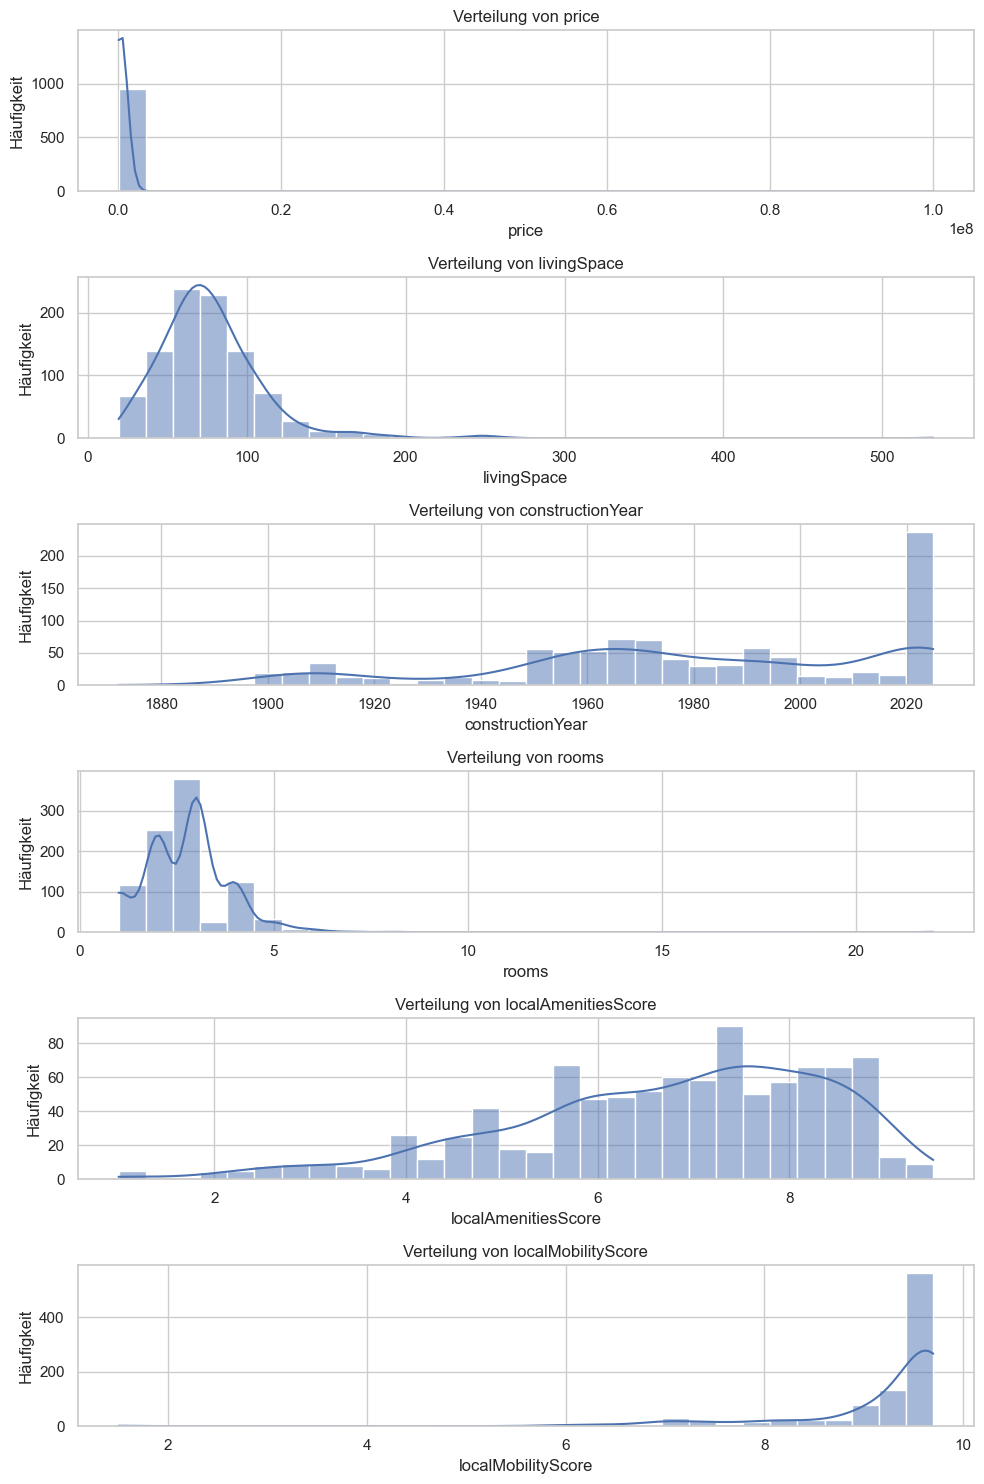

In [41]:
# Einstellen des Stils für die Visualisierungen
sns.set(style="whitegrid")

# Auswahl einiger Schlüsselvariablen für die Visualisierung
keyVariables = ['price', 'livingSpace', 'constructionYear', 'rooms', 'localAmenitiesScore', 'localMobilityScore']

# Erstellen von Histogrammen für diese Variablen
fig, axes = plt.subplots(len(keyVariables), 1, figsize=(10, 15))

for i, var in enumerate(keyVariables):
    sns.histplot(data[var], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f'Verteilung von {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Häufigkeit')

plt.tight_layout()
plt.show()

C:\Users\papad\AppData\Local\Temp\ipykernel_464\4075138833.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationMatrix = data.corr()


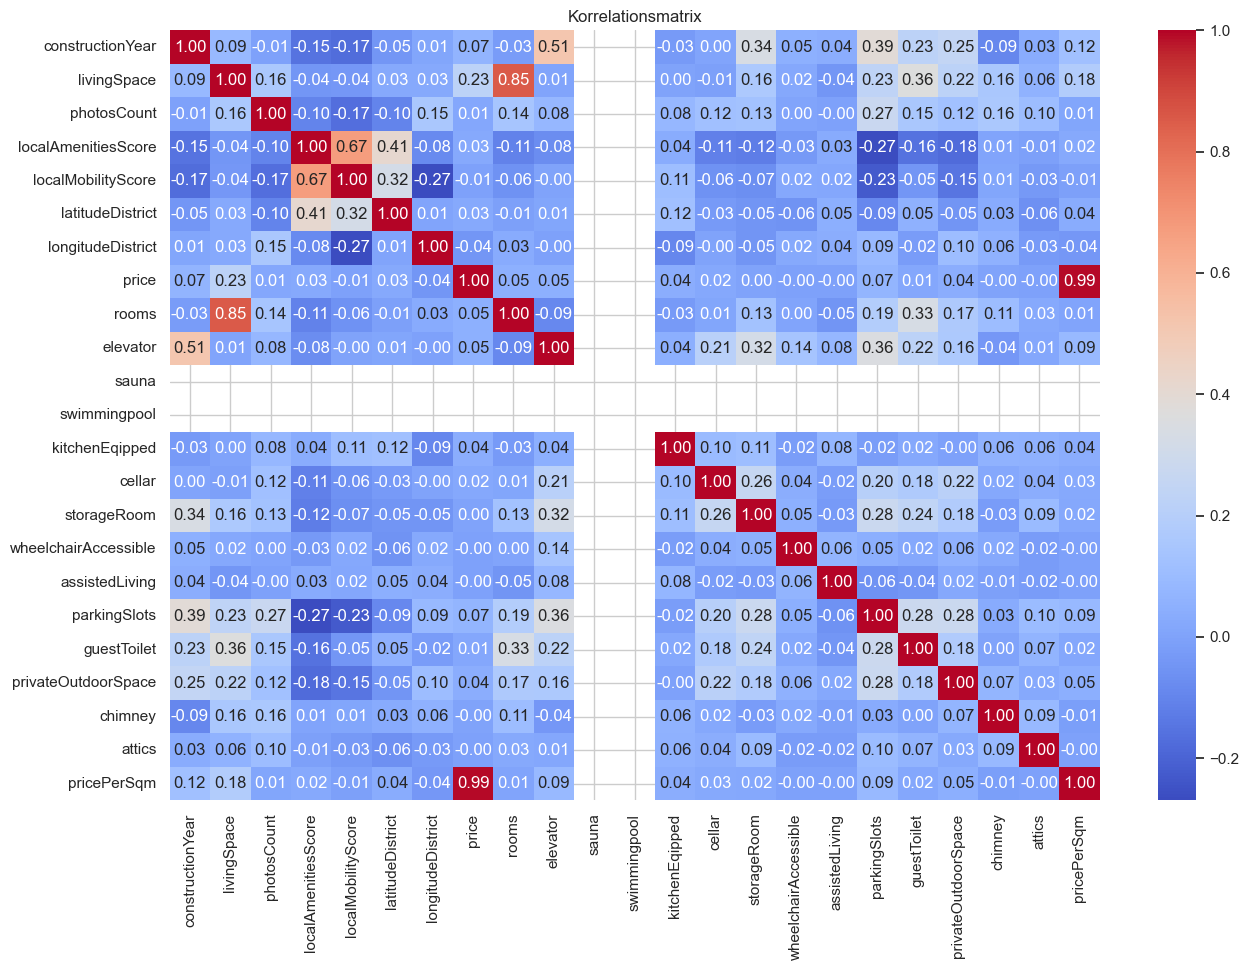

In [42]:
# Erstellen einer Korrelationsmatrix
correlationMatrix = data.corr()

# Visualisierung der Korrelationsmatrix mit einem Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlationMatrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Korrelationsmatrix")
plt.show()

In [43]:
# Auswahl der kategorialen Variablen
categoricalVars = ['exposeType', 'district']

# Häufigkeitsanalyse für jede kategoriale Variable
categoricalFrequencies = {var: data[var].value_counts() for var in categoricalVars}

categoricalFrequencies

{'exposeType': standard    773
 project     175
 Name: exposeType, dtype: int64,
 'district': Gostenhof        61
 Steinbühl        51
 Gleißhammer      36
 Mögeldorf        34
 Maxfeld          34
                  ..
 Worzeldorf        1
 Buch              1
 Gaismannshof      1
 Großgründlach     1
 Kraftshof         1
 Name: district, Length: 85, dtype: int64}

In [44]:
# Berechnung des Durchschnittspreises pro Quadratmeter pro Stadtteil
data['pricePerSqm'] = data['price'] / data['livingSpace']
averagePricePerSqmPerDistrict = data.groupby('district')['pricePerSqm'].mean().sort_values(ascending=False)

averagePricePerSqmPerDistrict.head(10)  # Anzeigen der Top 10 Stadtteile nach Durchschnittspreis pro Quadratmeter


district
Eberhardshof            378787.878788
Kleinreuth h d Veste      8139.047619
Rangierbahnhof            7634.891514
Gleißbühl                 7218.747137
Großgründlach             6795.743423
Großreuth h d Veste       6705.478623
Altenfurt                 6571.918860
Buch                      5798.387097
Veilhof                   5759.847128
Brunn                     5585.914648
Name: pricePerSqm, dtype: float64

Der Durchschnittspreis pro Quadratmeter ist für Eberhardshof außergewöhnlich hoch. Dies könnte auf eine Ausreißer-Immobilie mit einem sehr hohen Preis im Vergleich zur Wohnfläche hinweisen.

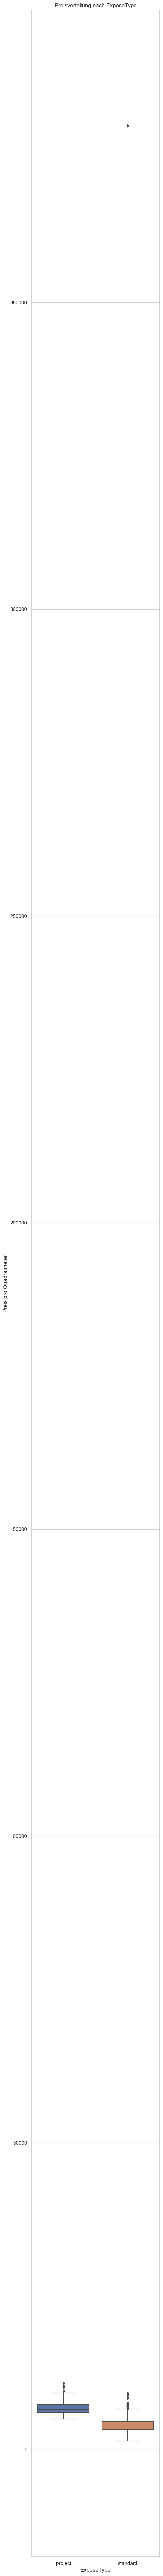

district
Eberhardshof            378787.878788
Kleinreuth h d Veste      8139.047619
Rangierbahnhof            7634.891514
Gleißbühl                 7218.747137
Großgründlach             6795.743423
Großreuth h d Veste       6705.478623
Altenfurt                 6571.918860
Buch                      5798.387097
Veilhof                   5759.847128
Brunn                     5585.914648
Name: pricePerSqm, dtype: float64

In [52]:
# Boxplots für 'exposeType' und deren Beziehung zum Preis
plt.figure(figsize=(5, 100))
sns.boxplot(x='exposeType', y='pricePerSqm', data=data)
plt.title('Preisverteilung nach ExposeType')
plt.xlabel('ExposeType')
plt.ylabel('Preis pro Quadratmeter')
plt.show()

# Berechnung der durchschnittlichen Preise pro Stadtteil
averagePricePerDistrict = data.groupby('district')['pricePerSqm'].mean().sort_values(ascending=False)

# Next steps:
A Umgang mit fehlenden Werten

- Ableitung von energyClass aus energyConsumption, buildingType und energyType  --> Dies würde zu einer Reduzierung der fehlenden Werte führen. Anschließend könnten energyConsumption, buildingType und energyType gelöscht werden, da sie dieselben Informationen enthalten und wahrscheinlich eine hohe Korrelation aufweisen (dies kann auch zuvor überprüft werden).
- Ersatz des fehlenden Werts in photoCount durch "0", da in diesem Fall kein Bild übermittelt wurde.
- Ersatz der fehlenden Werte in den Variablen "elevator" und "parkingSlot" durch "0" mit der Begründung, dass dies als Verkaufsvorteil gilt und daher alle Immobilien, die über einen Aufzug oder Parkplatz verfügen, angegeben wurden.
- Imputation der fehlenden Werte in "LocalAmenities" und "MobilityScore" (finde ähnliche geografische Immobilien im Datensatz und übernehme den Wert).

!!!Um die Regression durchzuführen, dürfen keinerlei fehlende Werte vorhanden sein!!! Im Notfall müssen diese Zeilen gelöscht werden.

- Die folgenden Variablen können gelöscht werden, da zu viele fehlende Werte vorhanden sind: equipments, houseCondition, condition, suitability, usage, category, priceCommoncharge


B Erstellung neuer Variablen

- siehe weiter unten (Lena hat hier bereits sehr gute Arbeit geleistet)
- Stadtteile (distinct) in folgenden Gruppen unterteilen: Nord, Süd, West, Ost, Zentrum (oder eine andere Aufteilung - siehe: https://www.nuernberg.de/internet/statistik/stadtteile.html


C.1 # change data type
df['...'] = pd.Categorical(df['...'])
df['...'] = pd.Categorical(df['...'])
df['...'] = pd.Categorical(df['...'])

C Daten analysieren (in zwei Gruppen: categorial und nummerisch)
 - arithmetisch
 - visuell
 
 Korrelationsmatrix erstellen
 Outlier bestimmen (Begründen: Influencing?)
 
 D Bestimmung notwendiger Variablen um Model zu bauen

In [34]:
# Deskriptive Statistik der numerischen Variablen
numericalSummary = data.describe()

# Prüfen auf fehlende Werte
missingValues = data.isnull().sum()

numericalSummary, missingValues

(       constructionYear  photosCount  localAmenitiesScore  localMobilityScore  \
 count        948.000000   948.000000           948.000000          948.000000   
 mean        1979.180380    13.060127             6.714161            9.175994   
 std           36.543477     9.490815             1.658366            0.919792   
 min         1872.000000     0.000000             1.000000            1.500000   
 25%         1957.000000     7.000000             5.700000            9.100000   
 50%         1977.000000    11.000000             7.000000            9.600000   
 75%         2019.250000    16.000000             8.000000            9.700000   
 max         2025.000000    54.000000             9.500000            9.700000   
 
        latitudeDistrict  longitudeDistrict         price       rooms  \
 count        948.000000         948.000000  9.480000e+02  948.000000   
 mean          49.443439          11.082795  4.633472e+05    2.757911   
 std            0.024613           0.0366

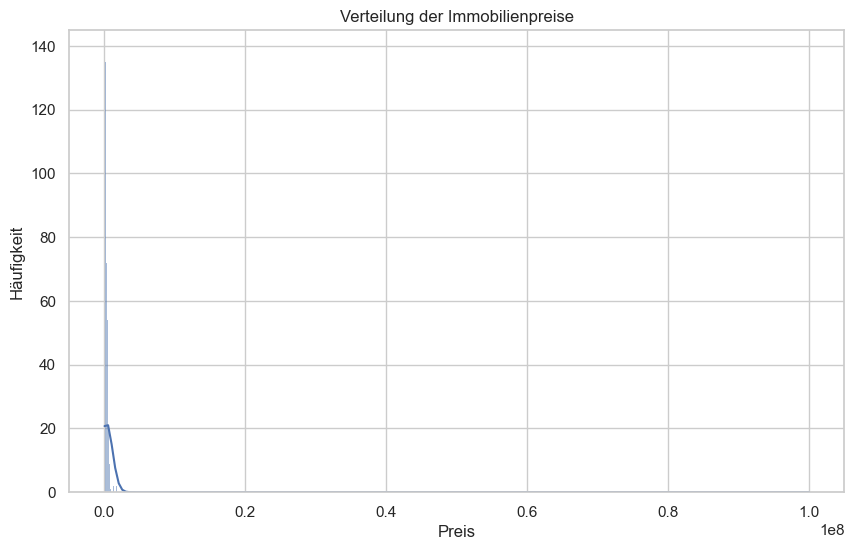

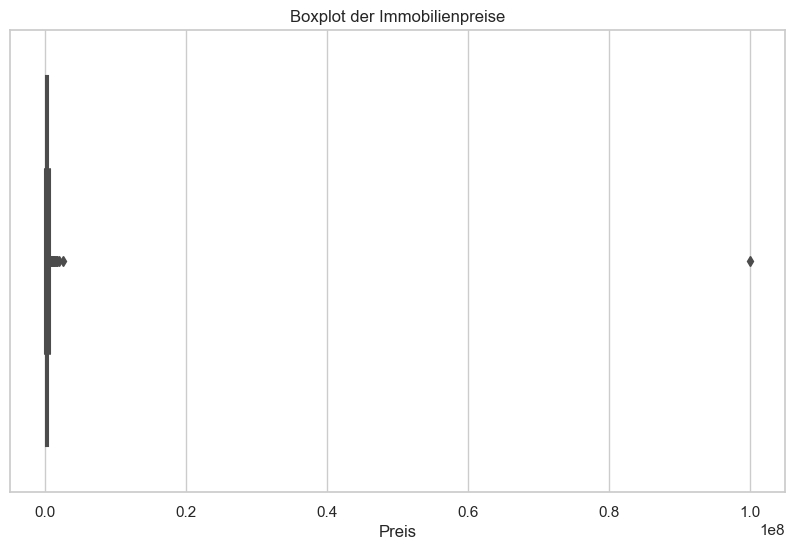

In [35]:
# Einstellung des Visualisierungsstils
sns.set(style="whitegrid")

# Visualisierung der Verteilung des Preises
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Verteilung der Immobilienpreise')
plt.xlabel('Preis')
plt.ylabel('Häufigkeit')
plt.show()

# Boxplot zur Untersuchung von Ausreißern
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price'])
plt.title('Boxplot der Immobilienpreise')
plt.xlabel('Preis')
plt.show()

Fehlende Werte ersetzen

In [124]:
df.drop(columns=["equipments", "houseCondition", "condition", "suitability", "usage", "category", "priceCommoncharge"], inplace=True)

KeyError: "['equipments', 'houseCondition', 'condition', 'suitability', 'usage', 'category', 'priceCommoncharge'] not found in axis"

In [ ]:
df["photosCount"].fillna(0, inplace=True)

In [ ]:
df['localAmenitiesScore'] = df.groupby('district')['localAmenitiesScore'].transform(lambda x: x.fillna(x.mean()))
df['localMobilityScore'] = df.groupby('district')['localMobilityScore'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
df["elevator"] = df["elevator"].notnull().astype(int).fillna(0)

In [ ]:
df["parkingSlots"] = df["parkingSlots"].notnull().astype(int).fillna(0)

In [ ]:
equipments = {
    "möbliert": 1,
    "teilweise möbliert": 2, 
    "neuwertig": 3,
    "teilweise möbliert, neuwertig": 4,
    "möbliert, neuwertig": 5
}

In [ ]:
energyClasses = {
    "DE_ENV2014_CLASS_A_PLUS": 1,
    "DE_ENV2014_CLASS_A": 2,
    "DE_ENV2014_CLASS_B": 3,
    "DE_ENV2014_CLASS_C": 4,
    "DE_ENV2014_CLASS_D": 5,
    "DE_ENV2014_CLASS_E": 6,
    "DE_ENV2014_CLASS_F": 7,
    "DE_ENV2014_CLASS_G": 8,
    "DE_ENV2014_CLASS_H": 9
}
df["energyClass"].replace(energyClasses, inplace=True)


In [ ]:
df.isna().sum()

constructionYear                                           0
livingSpace                                                0
Tealium.object_locationid                                  0
Tealium.object_address_is_visible                          0
Tealium.object_zip                                         0
Tealium.object_currency                                    0
Tealium.object_objektart_sub                               0
Tealium.expose_type                                        0
photosCount                                                0
localAmenitiesScore                                        0
localMobilityScore                                         0
Price.AdditionalInformation.Commission.CommissionType      0
EstateAddress.City                                         0
EstateAddress.ZipCode                                      0
EstateAddress.Street                                     634
Offerer.addressGuid                                        0
Offerer.globalUserId    

In [ ]:
# Only include predictor & response variables
df_pred_resp = df[["constructionYear", "livingSpace",
    "photosCount", "localAmenitiesScore",
    "localMobilityScore", "rooms",
    "energyConsumption", "elevator",
    "price", "energyClass", "district"]
    ].copy()

In [ ]:
df_pred_resp

,constructionYear,livingSpace,photosCount,localAmenitiesScore,localMobilityScore,rooms,energyConsumption,elevator,price,energyClass,district
0,2023.0,247.07,15.0,7.7,9.5,7.0,NaN,1,2539000.0,NaN,Mögeldorf
1,1900.0,69.00,23.0,6.5,9.7,2.0,NaN,1,225000.0,NaN,Gibitzenhof
2,1972.0,69.46,1.0,5.7,7.8,3.0,NaN,1,195000.0,NaN,Langwasser
3,2023.0,82.81,6.0,8.2,9.6,3.0,24.5,1,483623.0,1,Seeleinsbühl
4,2023.0,75.52,6.0,8.2,9.6,3.0,24.5,1,433956.0,1,Seeleinsbühl
...,...,...,...,...,...,...,...,...,...,...,...
956,2023.0,110.32,12.0,7.7,9.5,4.0,NaN,1,909000.0,NaN,Mögeldorf
957,2023.0,103.11,8.0,7.7,9.5,4.0,NaN,1,819000.0,NaN,Mögeldorf
958,1965.0,91.00,8.0,4.3,9.3,4.0,91.3,1,295000.0,4,Gibitzenhof
959,1958.0,34.00,18.0,8.9,9.7,1.0,118.3,1,198000.0,5,Maxfeld


### Variable lists

In [ ]:
# Mit 100M+ Outlier
alt.Chart(df_pred_resp).mark_boxplot().encode(
    x=alt.X("price:Q").scale(zero=False)
    ).properties(width=1500, height=100)

alt.Chart(...)

In [ ]:
# remove outlier for visualisation
df_pred_resp_vis = df_pred_resp.loc[df_pred_resp["price"] < 80000000]

In [ ]:
# Ohne 100M+ Outlier
alt.Chart(df_pred_resp_vis).mark_boxplot().encode(
    x=alt.X("price:Q").scale(zero=False)
    ).properties(width=1500, height=100)

alt.Chart(...)

In [ ]:
y_labels = ["price", "energyClass"]
x_labels = ["constructionYear", "livingSpace",
            "photosCount", "localAmenitiesScore",
            "localMobilityScore",
            "energyConsumption", "elevator"]

### Data splitting

## Analysis

### Descriptive statistics

In [ ]:
df_pred_resp.describe().T

,count,mean,std,min,25%,50%,75%,max
constructionYear,948.0,1979.180380,3.654348e+01,1872.00,1957.00,1977.0,2019.25,2025.0
livingSpace,948.0,77.190264,3.556277e+01,19.35,56.95,73.0,90.00,532.0
photosCount,948.0,13.060127,9.490815e+00,0.00,7.00,11.0,16.00,54.0
localAmenitiesScore,948.0,6.714161,1.658366e+00,1.00,5.70,7.0,8.00,9.5
localMobilityScore,948.0,9.175994,9.197925e-01,1.50,9.10,9.6,9.70,9.7
rooms,948.0,2.757911,1.216392e+00,1.00,2.00,3.0,3.00,22.0
energyConsumption,727.0,102.342352,5.431241e+01,0.00,67.60,103.3,135.25,326.0
elevator,948.0,1.000000,0.000000e+00,1.00,1.00,1.0,1.00,1.0
price,948.0,463347.173523,3.244513e+06,74000.00,203750.00,295000.0,445175.00,100000000.0


### Exploratory data analysis

In [ ]:
alt.renderers.enable('html')
alt.Chart(df_pred_resp_vis).mark_circle().encode(
    x=alt.X(alt.repeat("column"), 
            type='quantitative',
            scale=alt.Scale(zero=False)
            ),
    y=alt.Y(alt.repeat("row"), 
            type='quantitative',
            scale=alt.Scale(zero=False)
             )
).properties(
    width=150,
    height=150
).repeat(
    row=y_labels,
    column=x_labels
)

alt.RepeatChart(...)

### Relationships

## Model

### Select model

In [ ]:
df_pred_resp[y_labels]

,price,energyClass
0,2539000.0,NaN
1,225000.0,NaN
2,195000.0,NaN
3,483623.0,1
4,433956.0,1
...,...,...
956,909000.0,NaN
957,819000.0,NaN
958,295000.0,4
959,198000.0,5


In [ ]:
import statsmodels.api as sm

#X = sm.add_constant(df_pred_resp[["constructionYear", "livingSpace",  "localAmenitiesScore", "localMobilityScore", "elevator"]])
X = sm.add_constant(df_pred_resp[["constructionYear", "livingSpace", "elevator"]])
model = sm.OLS(df_pred_resp["price"], X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     26.45
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           6.68e-12
Time:                        17:38:58   Log-Likelihood:                -15532.
No. Observations:                 948   AIC:                         3.107e+04
Df Residuals:                     945   BIC:                         3.108e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
constructionYear  4116.1946   2822.688      1.458      0.145   -1423.267    9655.657
livingSpace       2.019e+04   2900.529      6.960      0.000    1.45e+04    2.59e+04
elevator         -9.242e+06   5.57e+06     -1.659      0.097   -2.02e+07    1.69e+06
==============================================================================
Omnibus:                     2526.107   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         31092545.704
Skew:                          29.298   Prob(JB):                         0.00
Kurtosis:                     888.279   Cond. No.                     1.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df_pred_resp["predicted"] = model.predict()

In [ ]:
data = ((df_pred_resp["predicted"] - df_pred_resp["price"])/df_pred_resp["price"])*100
#data = df_pred_resp["predicted"] - df_pred_resp["price"]
#sns.scatterplot(data=data)
import plotly.express as px
px.scatter(data)

### Training and validation

### Fit model

### Evaluation on test set

### Save model



Save your model in the folder `models/`. Use a meaningful name and a timestamp.

## Conclusions